In [ ]:
### Question5

In [1]:
import pandas as pd
import requests

In [2]:
### For extracting data from the API links like these, we need to use get() from 'requests' module 
response=requests.get('http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes')

In [3]:
### As per the sample data in our problem statement,our required 'episodes' data 
### has to be accessed through the '_embedded' key and 'episodes' key
raw_data=response.json() ## -->For observing the data , print the response.json() 

In [4]:
### storing the episodes data in the 'extract_data' variable
extract_data=raw_data['_embedded']['episodes']

In [5]:
data = pd.DataFrame(extract_data)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   36 non-null     int64         
 1   url                  36 non-null     object        
 2   name                 36 non-null     object        
 3   season               36 non-null     int64         
 4   number               36 non-null     int64         
 5   type                 36 non-null     object        
 6   airdate              36 non-null     datetime64[ns]
 7   airtime              36 non-null     object        
 8   airstamp             36 non-null     object        
 9   runtime              36 non-null     float64       
 10  summary              36 non-null     object        
 11  _links               36 non-null     object        
 12  average_rating       36 non-null     float64       
 13  medium_image_link    36 non-null     

In [7]:
### The values in 'airdate' column are to be converted to the datetime objects as follows: 
data['airdate']=pd.to_datetime(data['airdate'],format='%Y-%m-%d')

In [8]:
### Converting the values of 'airtime' column from 24 format to the 12 hour format
data['airtime']=pd.to_datetime(data['airtime'],format='%H:%M').dt.strftime('%I:%M %p')###Note:The outpout will string only

In [9]:
### Converting the values of 'runtime' column from 'int' to 'float'
data['runtime']=data['runtime'].astype('float')

In [10]:
### Extracting values of 'rating' column using the 'average' key and storing it in the new column
data['average_rating']=data['rating'].str.get('average')

In [11]:
### Let us drop the rating column which is of no use now
data = data.drop(labels=['rating'],axis=1)

In [12]:
### Replacing the html tags <p> and </p> with empty strings
data['summary']=data['summary'].str.replace("<p>",'').str.replace("</p>",'')

In [13]:
### Extracting the 'medium' image link using the get() method on dictionary
data['medium_image_link']=data['image'].str.get('medium')

In [14]:
### Extracting the 'original' image link using the get() method on dictionary
data['original_image_link']=data['image'].str.get('original')

In [15]:
### Dropping the 'image' columns as it is not required anymore
data=data.drop(labels='image',axis=1)

In [16]:
data.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,summary,_links,average_rating,medium_image_link,original_image_link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,2016-10-03T01:00:00+00:00,68.0,A woman named Dolores is a free spirit in the ...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,2016-10-10T01:00:00+00:00,60.0,Bernard suspects that someone is sabotaging th...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.7,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,2016-10-17T01:00:00+00:00,60.0,Bernard continues to investigate Dolores' supp...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.6,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,2016-10-24T01:00:00+00:00,60.0,While Dolores joins William and Logan on their...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.9,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,2016-10-31T01:00:00+00:00,60.0,Dolores takes the first step on her path of di...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.0,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [ ]:
### Question 8

In [18]:
#### The overall average rating of each season is as follows
data.groupby('season')['average_rating'].mean()

season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: average_rating, dtype: float64

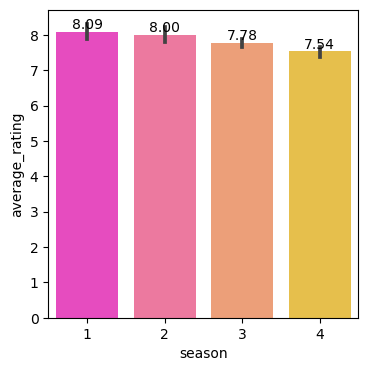

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
ax=sns.barplot(x='season',y='average_rating',data=data,palette='spring')
##To mention value on the top of each bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), format(p.get_height(), '.2f'),
            ha='center', va='bottom')

plt.show()


#### It is clear that the average rating of seasons declined gradually from season-1 to season-4

In [ ]:
● Get all the episode names, whose average rating is more than 8 for every season

In [19]:
data[data['average_rating']>8][['name','season','average_rating']]

,name,season,average_rating
6,Trompe L'Oeil,1,8.6
8,The Well-Tempered Clavier,1,8.5
9,The Bicameral Mind,1,8.7
17,Kiksuya,2,8.7
18,Vanishing Point,2,8.4
19,The Passenger,2,8.5


In [ ]:
● Get all the episode names that aired before May 2019

In [20]:
data[data['airdate']<'2019-05-01'][['name']]

,name
0,The Original
1,Chestnut
2,The Stray
3,Dissonance Theory
4,Contrapasso
5,The Adversary
6,Trompe L'Oeil
7,Trace Decay
8,The Well-Tempered Clavier
9,The Bicameral Mind


In [ ]:
● Get the episode name from each season with the highest and lowest rating

In [22]:
### Using groupby function the maximum and minimum average rating of each season is found and its corresponding Index is traced using
### idxmax()
highest_ratings_index = data.groupby('season')['average_rating'].idxmax()
lowest_ratings_index = data.groupby('season')['average_rating'].idxmin()

### These indexes and the corresponding names in 'name' column are segregated using ".loc[]"
highest_episodes = data.loc[highest_ratings_index, 'name']
lowest_episodes = data.loc[lowest_ratings_index, 'name']

pd.DataFrame({'Highest Rating': highest_episodes, 'Lowest Rating': lowest_episodes})


,Highest Rating,Lowest Rating
2,NaN,The Stray
9,The Bicameral Mind,NaN
14,NaN,Akane No Mai
17,Kiksuya,NaN
20,Parce Domine,NaN
25,NaN,Decoherence
28,NaN,The Auguries
32,Zhuangzi,NaN


In [ ]:
● Get the summary for the most popular ( ratings ) episode in every season

In [96]:
highest_rating_indexes=data.groupby('season')['average_rating'].idxmax()

episode_summary=data.loc[highest_rating_indexes,'summary']

summaries = pd.DataFrame({'summary':episode_summary})

,summary
9,Delores finds out the truth about William's fa...
17,Another of Westworld's Host revolutionaries is...
20,"If you're stuck in a loop, try walking in a st..."
32,God is bored.
